# Extrapolation

In [1]:
from sklearn.ensemble import RandomForestRegressor

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = np.linspace(0,1)

In [4]:
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [5]:
y = x + np.random.uniform(-0.2, 0.2, x.shape)

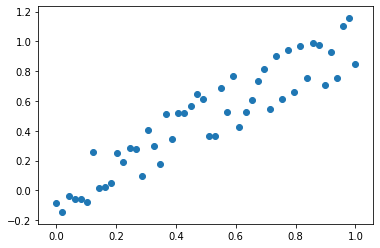

In [6]:
plt.scatter(x, y);

In [7]:
x_trn , x_val = x[:40], x[40:]
y_trn , y_val = y[:40], y[40:]

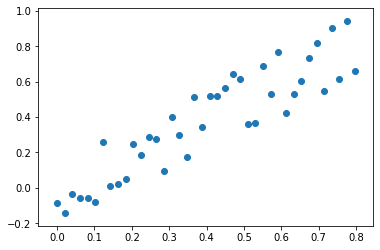

In [8]:
plt.scatter(x_trn, y_trn)

In [9]:
m = RandomForestRegressor().fit(x_trn, y_trn)

c:\users\engin\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285715 0.1632653  0.18367347 0.20408164 0.2244898
 0.24489796 0.26530612 0.2857143  0.30612245 0.3265306  0.3469388
 0.36734694 0.3877551  0.40816328 0.42857143 0.4489796  0.46938777
 0.48979592 0.5102041  0.53061223 0.5510204  0.5714286  0.59183675
 0.6122449  0.63265306 0.6530612  0.67346936 0.6938776  0.71428573
 0.7346939  0.75510204 0.7755102  0.79591835].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
x.shape

(50,)

## Adding dimension

In [11]:
x[None, :].shape

(1, 50)

In [12]:
x[None,].shape

(1, 50)

In [13]:
x[:,None].shape

(50, 1)

In [14]:
x[,None].shape

SyntaxError: invalid syntax (<ipython-input-14-cfd73600548b>, line 1)

we want 50 rows and 1 column

In [15]:
# Regardless of how many dimension it has, add dimension to the end
x = x[..., None]

In [16]:
x.shape

(50, 1)

In [17]:
x_trn , x_val = x[:40], x[40:]
y_trn , y_val = y[:40], y[40:]

In [18]:
m = RandomForestRegressor().fit(x_trn, y_trn)

c:\users\engin\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


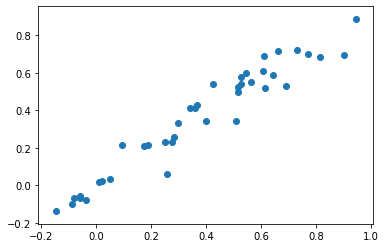

In [19]:
plt.scatter(y_trn, m.predict(x_trn))

**Random forest cannot produce higher result that one it saw in the x_train and that means it has an extrapolation problem**

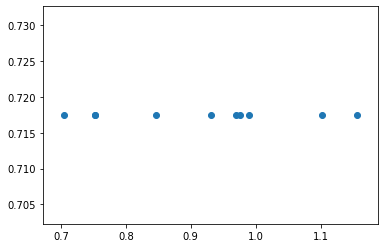

In [20]:
plt.scatter(y_val, m.predict(x_val))